# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 기본 LSTM 모델
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

In [11]:
# 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np

In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [10]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [12]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

W0813 21:00:40.898896 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 21:00:40.929877 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:00:40.933875 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0813 21:00:55.041833 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 21:00:55.164782 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2)

W0813 21:04:47.799145 23940 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0813 21:04:49.167363 23940 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2000
 - 1s - loss: 2.4837 - acc: 0.1400
Epoch 2/2000
 - 0s - loss: 2.4449 - acc: 0.2400
Epoch 3/2000
 - 0s - loss: 2.4060 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3641 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3104 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2474 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.1761 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.0943 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 2.0185 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9813 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9745 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9571 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9409 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9246 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9248 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9205 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9201 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9129 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9063 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9012 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

 - 0s - loss: 1.5776 - acc: 0.4400
Epoch 168/2000
 - 0s - loss: 1.5784 - acc: 0.4400
Epoch 169/2000
 - 0s - loss: 1.5771 - acc: 0.4400
Epoch 170/2000
 - 0s - loss: 1.5631 - acc: 0.4400
Epoch 171/2000
 - 0s - loss: 1.5817 - acc: 0.3600
Epoch 172/2000
 - 0s - loss: 1.5732 - acc: 0.4000
Epoch 173/2000
 - 0s - loss: 1.5632 - acc: 0.4400
Epoch 174/2000
 - 0s - loss: 1.5640 - acc: 0.4400
Epoch 175/2000
 - 0s - loss: 1.5649 - acc: 0.4400
Epoch 176/2000
 - 0s - loss: 1.5621 - acc: 0.4400
Epoch 177/2000
 - 0s - loss: 1.5703 - acc: 0.3800
Epoch 178/2000
 - 0s - loss: 1.5632 - acc: 0.3600
Epoch 179/2000
 - 0s - loss: 1.5508 - acc: 0.4200
Epoch 180/2000
 - 0s - loss: 1.5457 - acc: 0.4400
Epoch 181/2000
 - 0s - loss: 1.5460 - acc: 0.4400
Epoch 182/2000
 - 0s - loss: 1.5451 - acc: 0.4800
Epoch 183/2000
 - 0s - loss: 1.5381 - acc: 0.4800
Epoch 184/2000
 - 0s - loss: 1.5404 - acc: 0.4000
Epoch 185/2000
 - 0s - loss: 1.5654 - acc: 0.4000
Epoch 186/2000
 - 0s - loss: 1.5351 - acc: 0.4400
Epoch 187/2000


Epoch 332/2000
 - 0s - loss: 1.2760 - acc: 0.5800
Epoch 333/2000
 - 0s - loss: 1.2637 - acc: 0.5800
Epoch 334/2000
 - 0s - loss: 1.2616 - acc: 0.5400
Epoch 335/2000
 - 0s - loss: 1.2675 - acc: 0.5800
Epoch 336/2000
 - 0s - loss: 1.2663 - acc: 0.5600
Epoch 337/2000
 - 0s - loss: 1.2520 - acc: 0.6000
Epoch 338/2000
 - 0s - loss: 1.2677 - acc: 0.5800
Epoch 339/2000
 - 0s - loss: 1.2501 - acc: 0.5800
Epoch 340/2000
 - 0s - loss: 1.2688 - acc: 0.4800
Epoch 341/2000
 - 0s - loss: 1.2430 - acc: 0.5600
Epoch 342/2000
 - 0s - loss: 1.2575 - acc: 0.6000
Epoch 343/2000
 - 0s - loss: 1.2499 - acc: 0.5400
Epoch 344/2000
 - 0s - loss: 1.2611 - acc: 0.5600
Epoch 345/2000
 - 0s - loss: 1.2392 - acc: 0.5200
Epoch 346/2000
 - 0s - loss: 1.2556 - acc: 0.5800
Epoch 347/2000
 - 0s - loss: 1.2400 - acc: 0.5600
Epoch 348/2000
 - 0s - loss: 1.2482 - acc: 0.5400
Epoch 349/2000
 - 0s - loss: 1.2509 - acc: 0.5400
Epoch 350/2000
 - 0s - loss: 1.2506 - acc: 0.5800
Epoch 351/2000
 - 0s - loss: 1.2273 - acc: 0.5600


Epoch 496/2000
 - 0s - loss: 1.0000 - acc: 0.5800
Epoch 497/2000
 - 0s - loss: 0.9960 - acc: 0.5600
Epoch 498/2000
 - 0s - loss: 0.9816 - acc: 0.6400
Epoch 499/2000
 - 0s - loss: 0.9980 - acc: 0.6400
Epoch 500/2000
 - 0s - loss: 0.9929 - acc: 0.6400
Epoch 501/2000
 - 0s - loss: 0.9853 - acc: 0.6600
Epoch 502/2000
 - 0s - loss: 0.9955 - acc: 0.6200
Epoch 503/2000
 - 0s - loss: 0.9819 - acc: 0.6600
Epoch 504/2000
 - 0s - loss: 1.0032 - acc: 0.6400
Epoch 505/2000
 - 0s - loss: 0.9752 - acc: 0.6400
Epoch 506/2000
 - 0s - loss: 0.9717 - acc: 0.6400
Epoch 507/2000
 - 0s - loss: 0.9674 - acc: 0.6400
Epoch 508/2000
 - 0s - loss: 0.9798 - acc: 0.6400
Epoch 509/2000
 - 0s - loss: 0.9834 - acc: 0.6400
Epoch 510/2000
 - 0s - loss: 0.9727 - acc: 0.6400
Epoch 511/2000
 - 0s - loss: 0.9697 - acc: 0.6200
Epoch 512/2000
 - 0s - loss: 0.9743 - acc: 0.6200
Epoch 513/2000
 - 0s - loss: 0.9599 - acc: 0.6200
Epoch 514/2000
 - 0s - loss: 0.9671 - acc: 0.6600
Epoch 515/2000
 - 0s - loss: 0.9647 - acc: 0.6600


Epoch 660/2000
 - 0s - loss: 0.7381 - acc: 0.7000
Epoch 661/2000
 - 0s - loss: 0.7250 - acc: 0.7600
Epoch 662/2000
 - 0s - loss: 0.7337 - acc: 0.7400
Epoch 663/2000
 - 0s - loss: 0.7184 - acc: 0.7400
Epoch 664/2000
 - 0s - loss: 0.7242 - acc: 0.7000
Epoch 665/2000
 - 0s - loss: 0.7156 - acc: 0.7600
Epoch 666/2000
 - 0s - loss: 0.7577 - acc: 0.6800
Epoch 667/2000
 - 0s - loss: 0.7235 - acc: 0.6800
Epoch 668/2000
 - 0s - loss: 0.7504 - acc: 0.7400
Epoch 669/2000
 - 0s - loss: 0.7258 - acc: 0.7400
Epoch 670/2000
 - 0s - loss: 0.7321 - acc: 0.7200
Epoch 671/2000
 - 0s - loss: 0.7186 - acc: 0.7400
Epoch 672/2000
 - 0s - loss: 0.7524 - acc: 0.7400
Epoch 673/2000
 - 0s - loss: 0.7271 - acc: 0.7200
Epoch 674/2000
 - 0s - loss: 0.7320 - acc: 0.7000
Epoch 675/2000
 - 0s - loss: 0.7457 - acc: 0.7000
Epoch 676/2000
 - 0s - loss: 0.7189 - acc: 0.7200
Epoch 677/2000
 - 0s - loss: 0.7121 - acc: 0.7400
Epoch 678/2000
 - 0s - loss: 0.7116 - acc: 0.6800
Epoch 679/2000
 - 0s - loss: 0.6972 - acc: 0.7200


Epoch 824/2000
 - 0s - loss: 0.5903 - acc: 0.8000
Epoch 825/2000
 - 0s - loss: 0.5936 - acc: 0.7800
Epoch 826/2000
 - 0s - loss: 0.5585 - acc: 0.7600
Epoch 827/2000
 - 0s - loss: 0.5716 - acc: 0.8000
Epoch 828/2000
 - 0s - loss: 0.5654 - acc: 0.8000
Epoch 829/2000
 - 0s - loss: 0.5474 - acc: 0.8000
Epoch 830/2000
 - 0s - loss: 0.5732 - acc: 0.8200
Epoch 831/2000
 - 0s - loss: 0.5959 - acc: 0.7600
Epoch 832/2000
 - 0s - loss: 0.5929 - acc: 0.7800
Epoch 833/2000
 - 0s - loss: 0.5649 - acc: 0.8000
Epoch 834/2000
 - 0s - loss: 0.5598 - acc: 0.8400
Epoch 835/2000
 - 0s - loss: 0.5358 - acc: 0.8400
Epoch 836/2000
 - 0s - loss: 0.5461 - acc: 0.8200
Epoch 837/2000
 - 0s - loss: 0.5474 - acc: 0.8200
Epoch 838/2000
 - 0s - loss: 0.5463 - acc: 0.8200
Epoch 839/2000
 - 0s - loss: 0.5402 - acc: 0.8400
Epoch 840/2000
 - 0s - loss: 0.5845 - acc: 0.7800
Epoch 841/2000
 - 0s - loss: 0.5305 - acc: 0.8400
Epoch 842/2000
 - 0s - loss: 0.5706 - acc: 0.7800
Epoch 843/2000
 - 0s - loss: 0.5512 - acc: 0.8000


Epoch 988/2000
 - 0s - loss: 0.4684 - acc: 0.8400
Epoch 989/2000
 - 0s - loss: 0.4584 - acc: 0.8400
Epoch 990/2000
 - 0s - loss: 0.4541 - acc: 0.8600
Epoch 991/2000
 - 0s - loss: 0.4554 - acc: 0.8600
Epoch 992/2000
 - 0s - loss: 0.4921 - acc: 0.8200
Epoch 993/2000
 - 0s - loss: 0.4536 - acc: 0.8600
Epoch 994/2000
 - 0s - loss: 0.4774 - acc: 0.8600
Epoch 995/2000
 - 0s - loss: 0.4551 - acc: 0.8600
Epoch 996/2000
 - 0s - loss: 0.4832 - acc: 0.8000
Epoch 997/2000
 - 0s - loss: 0.4741 - acc: 0.8400
Epoch 998/2000
 - 0s - loss: 0.4581 - acc: 0.8400
Epoch 999/2000
 - 0s - loss: 0.4923 - acc: 0.8400
Epoch 1000/2000
 - 0s - loss: 0.4450 - acc: 0.8600
Epoch 1001/2000
 - 0s - loss: 0.5041 - acc: 0.8000
Epoch 1002/2000
 - 0s - loss: 0.4364 - acc: 0.8800
Epoch 1003/2000
 - 0s - loss: 0.4942 - acc: 0.8200
Epoch 1004/2000
 - 0s - loss: 0.4616 - acc: 0.8200
Epoch 1005/2000
 - 0s - loss: 0.4449 - acc: 0.8200
Epoch 1006/2000
 - 0s - loss: 0.4563 - acc: 0.8400
Epoch 1007/2000
 - 0s - loss: 0.4503 - acc:

Epoch 1149/2000
 - 0s - loss: 0.5044 - acc: 0.8400
Epoch 1150/2000
 - 0s - loss: 0.4160 - acc: 0.8600
Epoch 1151/2000
 - 0s - loss: 0.4456 - acc: 0.8400
Epoch 1152/2000
 - 0s - loss: 0.4472 - acc: 0.8400
Epoch 1153/2000
 - 0s - loss: 0.4186 - acc: 0.8400
Epoch 1154/2000
 - 0s - loss: 0.4528 - acc: 0.8000
Epoch 1155/2000
 - 0s - loss: 0.3908 - acc: 0.8800
Epoch 1156/2000
 - 0s - loss: 0.4554 - acc: 0.8200
Epoch 1157/2000
 - 0s - loss: 0.4676 - acc: 0.8400
Epoch 1158/2000
 - 0s - loss: 0.4261 - acc: 0.8400
Epoch 1159/2000
 - 0s - loss: 0.4318 - acc: 0.8200
Epoch 1160/2000
 - 0s - loss: 0.3929 - acc: 0.8800
Epoch 1161/2000
 - 0s - loss: 0.4072 - acc: 0.8600
Epoch 1162/2000
 - 0s - loss: 0.3956 - acc: 0.8600
Epoch 1163/2000
 - 0s - loss: 0.3970 - acc: 0.8600
Epoch 1164/2000
 - 0s - loss: 0.3994 - acc: 0.8600
Epoch 1165/2000
 - 0s - loss: 0.4116 - acc: 0.8200
Epoch 1166/2000
 - 0s - loss: 0.4056 - acc: 0.8400
Epoch 1167/2000
 - 0s - loss: 0.3921 - acc: 0.8400
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.3522 - acc: 0.8600
Epoch 1311/2000
 - 0s - loss: 0.3677 - acc: 0.8600
Epoch 1312/2000
 - 0s - loss: 0.3534 - acc: 0.8600
Epoch 1313/2000
 - 0s - loss: 0.3729 - acc: 0.8400
Epoch 1314/2000
 - 0s - loss: 0.3582 - acc: 0.8600
Epoch 1315/2000
 - 0s - loss: 0.3734 - acc: 0.8200
Epoch 1316/2000
 - 0s - loss: 0.3482 - acc: 0.8600
Epoch 1317/2000
 - 0s - loss: 0.3511 - acc: 0.8600
Epoch 1318/2000
 - 0s - loss: 0.3647 - acc: 0.8400
Epoch 1319/2000
 - 0s - loss: 0.3684 - acc: 0.8600
Epoch 1320/2000
 - 0s - loss: 0.3469 - acc: 0.8600
Epoch 1321/2000
 - 0s - loss: 0.3797 - acc: 0.8600
Epoch 1322/2000
 - 0s - loss: 0.3538 - acc: 0.8800
Epoch 1323/2000
 - 0s - loss: 0.3720 - acc: 0.8600
Epoch 1324/2000
 - 0s - loss: 0.3700 - acc: 0.8600
Epoch 1325/2000
 - 0s - loss: 0.3465 - acc: 0.8800
Epoch 1326/2000
 - 0s - loss: 0.3659 - acc: 0.8800
Epoch 1327/2000
 - 0s - loss: 0.3559 - acc: 0.8400
Epoch 1328/2000
 - 0s - loss: 0.3574 - acc: 0.8400
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.3795 - acc: 0.8600
Epoch 1472/2000
 - 0s - loss: 0.3844 - acc: 0.8600
Epoch 1473/2000
 - 0s - loss: 0.3590 - acc: 0.8800
Epoch 1474/2000
 - 0s - loss: 0.3535 - acc: 0.8400
Epoch 1475/2000
 - 0s - loss: 0.3350 - acc: 0.9000
Epoch 1476/2000
 - 0s - loss: 0.3379 - acc: 0.8600
Epoch 1477/2000
 - 0s - loss: 0.3379 - acc: 0.8400
Epoch 1478/2000
 - 0s - loss: 0.3374 - acc: 0.9000
Epoch 1479/2000
 - 0s - loss: 0.3318 - acc: 0.8400
Epoch 1480/2000
 - 0s - loss: 0.3384 - acc: 0.8800
Epoch 1481/2000
 - 0s - loss: 0.3284 - acc: 0.8800
Epoch 1482/2000
 - 0s - loss: 0.3227 - acc: 0.8600
Epoch 1483/2000
 - 0s - loss: 0.3250 - acc: 0.8600
Epoch 1484/2000
 - 0s - loss: 0.3308 - acc: 0.8600
Epoch 1485/2000
 - 0s - loss: 0.3266 - acc: 0.8600
Epoch 1486/2000
 - 0s - loss: 0.3296 - acc: 0.8600
Epoch 1487/2000
 - 0s - loss: 0.3298 - acc: 0.8600
Epoch 1488/2000
 - 0s - loss: 0.3306 - acc: 0.8600
Epoch 1489/2000
 - 0s - loss: 0.3500 - acc: 0.8400
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.3206 - acc: 0.8600
Epoch 1633/2000
 - 0s - loss: 0.3088 - acc: 0.8600
Epoch 1634/2000
 - 0s - loss: 0.3405 - acc: 0.8600
Epoch 1635/2000
 - 0s - loss: 0.2897 - acc: 0.9000
Epoch 1636/2000
 - 0s - loss: 0.3418 - acc: 0.8800
Epoch 1637/2000
 - 0s - loss: 0.3032 - acc: 0.8800
Epoch 1638/2000
 - 0s - loss: 0.3370 - acc: 0.8600
Epoch 1639/2000
 - 0s - loss: 0.2972 - acc: 0.8800
Epoch 1640/2000
 - 0s - loss: 0.3342 - acc: 0.8600
Epoch 1641/2000
 - 0s - loss: 0.3430 - acc: 0.8600
Epoch 1642/2000
 - 0s - loss: 0.3146 - acc: 0.8600
Epoch 1643/2000
 - 0s - loss: 0.3363 - acc: 0.8800
Epoch 1644/2000
 - 0s - loss: 0.3313 - acc: 0.8800
Epoch 1645/2000
 - 0s - loss: 0.3413 - acc: 0.8800
Epoch 1646/2000
 - 0s - loss: 0.3238 - acc: 0.8600
Epoch 1647/2000
 - 0s - loss: 0.3268 - acc: 0.8600
Epoch 1648/2000
 - 0s - loss: 0.3342 - acc: 0.8400
Epoch 1649/2000
 - 0s - loss: 0.3192 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0.3202 - acc: 0.8800
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.3029 - acc: 0.8400
Epoch 1794/2000
 - 0s - loss: 0.3039 - acc: 0.8600
Epoch 1795/2000
 - 0s - loss: 0.3020 - acc: 0.8600
Epoch 1796/2000
 - 0s - loss: 0.3008 - acc: 0.8600
Epoch 1797/2000
 - 0s - loss: 0.2915 - acc: 0.8800
Epoch 1798/2000
 - 0s - loss: 0.2889 - acc: 0.9000
Epoch 1799/2000
 - 0s - loss: 0.2953 - acc: 0.8200
Epoch 1800/2000
 - 0s - loss: 0.2899 - acc: 0.8400
Epoch 1801/2000
 - 0s - loss: 0.2939 - acc: 0.8800
Epoch 1802/2000
 - 0s - loss: 0.2976 - acc: 0.8800
Epoch 1803/2000
 - 0s - loss: 0.3009 - acc: 0.8800
Epoch 1804/2000
 - 0s - loss: 0.2918 - acc: 0.9000
Epoch 1805/2000
 - 0s - loss: 0.2930 - acc: 0.8800
Epoch 1806/2000
 - 0s - loss: 0.2952 - acc: 0.8600
Epoch 1807/2000
 - 0s - loss: 0.2918 - acc: 0.8600
Epoch 1808/2000
 - 0s - loss: 0.2910 - acc: 0.8400
Epoch 1809/2000
 - 0s - loss: 0.2994 - acc: 0.8800
Epoch 1810/2000
 - 0s - loss: 0.2960 - acc: 0.8600
Epoch 1811/2000
 - 0s - loss: 0.2900 - acc: 0.8600
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.2963 - acc: 0.8600
Epoch 1955/2000
 - 0s - loss: 0.2891 - acc: 0.8600
Epoch 1956/2000
 - 0s - loss: 0.2831 - acc: 0.9200
Epoch 1957/2000
 - 0s - loss: 0.2893 - acc: 0.9000
Epoch 1958/2000
 - 0s - loss: 0.2873 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.2825 - acc: 0.9000
Epoch 1960/2000
 - 0s - loss: 0.2784 - acc: 0.8800
Epoch 1961/2000
 - 0s - loss: 0.2846 - acc: 0.8600
Epoch 1962/2000
 - 0s - loss: 0.2791 - acc: 0.9000
Epoch 1963/2000
 - 0s - loss: 0.2880 - acc: 0.8600
Epoch 1964/2000
 - 0s - loss: 0.3009 - acc: 0.8800
Epoch 1965/2000
 - 0s - loss: 0.2716 - acc: 0.9000
Epoch 1966/2000
 - 0s - loss: 0.2994 - acc: 0.8600
Epoch 1967/2000
 - 0s - loss: 0.3196 - acc: 0.8400
Epoch 1968/2000
 - 0s - loss: 0.2994 - acc: 0.8400
Epoch 1969/2000
 - 0s - loss: 0.2934 - acc: 0.9000
Epoch 1970/2000
 - 0s - loss: 0.3021 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.2896 - acc: 0.8800
Epoch 1972/2000
 - 0s - loss: 0.3087 - acc: 0.8600
Epoch 1973/2000
 - 0s - loss: 0

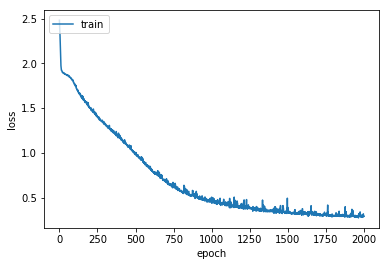

In [15]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step
acc: 90.00%


In [17]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [18]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_one_step_prediction.mp3)

In [19]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1))    # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_full_song_prediction.mp3)